In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from matplotlib import rcParams
import pandas as pd
import seaborn as sns
matplotlib_font_size=7
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams['font.size'] = matplotlib_font_size


path_figures=Path().cwd().parent.parent/"figures"
path_figures.mkdir(parents=True, exist_ok=True)
path_benchmark_data=Path.cwd().parent.parent/"benchmark_for_test"
path_benchmark_data.mkdir(parents=True, exist_ok=True)

In [2]:
steps=[
    "open_search", 
    "neutral_loss_search",
    "hybrid_search"
    ]
library_size=1_000_000
query_size=100
ion_mode=[-1,1]


In [ ]:
df=[]
for charge in ion_mode:
    for i in range(query_size):
        data={"total_library_number":library_size, "query_idx":i, "charge":charge}
        
        for step in steps:       
            
            
            path_benchmark_dynamic_fast_update=path_benchmark_data/f"dynamic_fast_update_{charge}_{library_size}_memory_usage_{step}_step_query_{i}.txt"
            path_benchmark_dynamic_convert_to_flash=path_benchmark_data/f"dynamic_convert_to_flash_{charge}_{library_size}_memory_usage_{step}_step_query_{i}.txt"
            path_benchmark_flash=path_benchmark_data/f"flash_{charge}_{library_size}_memory_usage_{step}_step_query_{i}.txt"

            try:
                path_benchmark_masstplus=path_benchmark_data/f"masstplus_{charge}_{library_size}_memory_usage_{step}_step_query_{i}.txt"
                with open(path_benchmark_masstplus,"r") as f:    
                    for line in f.readlines():
                        items=line.split(":", maxsplit=1)
                        key, value=items
                        if key.strip()=="Maximum resident set size (kbytes)":
                            masstplus=int(value.strip())
                data["masstplus"]=masstplus/1048576
            except:
                data["masstplus"]=None
 

            with open(path_benchmark_dynamic_fast_update,"r") as f:
                for line in f.readlines():
                    items=line.split(":", maxsplit=1)
                    key, value=items
                    if key.strip()=="Maximum resident set size (kbytes)":
                        dynamic_fast_update=int(value.strip())


            with open(path_benchmark_dynamic_convert_to_flash,"r") as f:
                for line in f.readlines():
                    items=line.split(":", maxsplit=1)
                    key, value=items
                    if key.strip()=="Maximum resident set size (kbytes)":
                        dynamic_convert_to_flash=int(value.strip())


            with open(path_benchmark_flash,"r") as f:    
                for line in f.readlines():
                    items=line.split(":", maxsplit=1)
                    key, value=items
                    if key.strip()=="Maximum resident set size (kbytes)":
                        flash=int(value.strip())


            # data["dynamic_entropy_search(fast_search)"]=dynamic_fast_search/1048576
            data["dynamic_entropy_search(fast_update)"]=dynamic_fast_update/1048576
            data["dynamic_entropy_search(convert_to_flash)"]=dynamic_convert_to_flash/1048576
            data["flash_entropy_search"]=flash/1048576
            data["search_type"]=step 


            df.append(pd.DataFrame([data]))
            
df=pd.concat(df)

df


/tmp/ipykernel_943927/1849616308.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df=pd.concat(df)


,total_library_number,query_idx,charge,masstplus,dynamic_entropy_search(fast_update),dynamic_entropy_search(convert_to_flash),flash_entropy_search,search_type
0,1000000,0,-1,NaN,0.044987,0.049999,0.045940,open_search
0,1000000,0,-1,NaN,0.051189,0.051987,0.050785,neutral_loss_search
0,1000000,0,-1,0.206997,0.062622,0.067848,0.070049,hybrid_search
0,1000000,1,-1,NaN,0.037926,0.046101,0.042622,open_search
0,1000000,1,-1,NaN,0.046837,0.051071,0.051102,neutral_loss_search
...,...,...,...,...,...,...,...,...
0,1000000,98,1,NaN,0.060020,0.093712,0.090157,neutral_loss_search
0,1000000,98,1,0.448849,0.104988,0.170139,0.168068,hybrid_search
0,1000000,99,1,NaN,0.037712,0.042904,0.037922,open_search
0,1000000,99,1,NaN,0.038395,0.043148,0.038773,neutral_loss_search


In [ ]:

df_data = df[["search_type", 
              "charge",
            "dynamic_entropy_search(fast_update)",
            "dynamic_entropy_search(convert_to_flash)", 
            "flash_entropy_search",
            "masstplus"
            ]]
    
df_melted=df_data.melt(id_vars=["charge", "search_type"], var_name="method", value_name="memory_usage")
df_melted        
        


,charge,search_type,method,memory_usage
0,-1,open_search,dynamic_entropy_search(fast_update),0.044987
1,-1,neutral_loss_search,dynamic_entropy_search(fast_update),0.051189
2,-1,hybrid_search,dynamic_entropy_search(fast_update),0.062622
3,-1,open_search,dynamic_entropy_search(fast_update),0.037926
4,-1,neutral_loss_search,dynamic_entropy_search(fast_update),0.046837
...,...,...,...,...
2395,1,neutral_loss_search,masstplus,NaN
2396,1,hybrid_search,masstplus,0.448849
2397,1,open_search,masstplus,NaN
2398,1,neutral_loss_search,masstplus,NaN


/tmp/ipykernel_943927/576444006.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()
/tmp/ipykernel_943927/576444006.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()
/tmp/ipykernel_943927/576444006.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


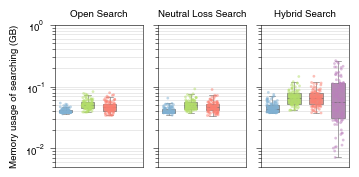

In [ ]:
charge=-1
df_charge=df_melted[df_melted["charge"]==charge]
hue_order=["dynamic_entropy_search(fast_update)", "dynamic_entropy_search(convert_to_flash)", "flash_entropy_search", "masstplus"]
color_palette_set2 = sns.color_palette("Set3", 12)

color_palette={
    
    "dynamic_entropy_search(fast_update)": color_palette_set2[4],
    "dynamic_entropy_search(convert_to_flash)": color_palette_set2[6],
    "flash_entropy_search":color_palette_set2[3],
    "masstplus":color_palette_set2[-3]
}

# Plotting
        
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(3.6, 2.4), width_ratios=[1.2,1.2,1.2], sharex=False, sharey=True)

for i, search in enumerate(["open_search", "neutral_loss_search", "hybrid_search"]):
    df_plot=df_charge[df_charge["search_type"]==search]
    ax=axes[i]
    ax.grid(True, which="both", axis="y", ls="-", alpha=0.5, linewidth=0.4)
    ax.set_title(search.replace("_"," ").title(), fontsize=matplotlib_font_size)

    sns.stripplot(x="method", y="memory_usage", hue="method", data=df_plot, hue_order=hue_order, palette=color_palette, dodge=False, jitter=0.25, size=2, alpha=0.5, linewidth=0, ax=ax, legend=False)        
            
    sns.boxplot(x="method", y="memory_usage", hue="method", data=df_plot, hue_order=hue_order, dodge=False, palette=color_palette, linewidth=0.4, width=0.6, ax=ax, fliersize=0)
    
    ax.tick_params(which="both", width=0.4)          
    for spine in ax.spines.values():  
        spine.set_linewidth(0.4)

    ax.legend().remove()
    ax.set_ylim(bottom=5e-3, top=1e0)
    # ax.set_yscale("log")
    ax.set_ylabel("Memory usage of searching (GB)")
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_xticks([])
if charge==-1:
    mode="-"
elif charge==1:
    mode="+"
# fig.text(0.5, 0.2, f"({mode}) ESI", ha='center', va='bottom', fontsize=matplotlib_font_size)
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)
# Save figure
plt.savefig(path_figures / f"memory_usage_different_search_methods_charge_{charge}_lib_scale_1000000.svg", bbox_inches="tight", pad_inches=0.1)

/tmp/ipykernel_943927/1280813427.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()
/tmp/ipykernel_943927/1280813427.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()
/tmp/ipykernel_943927/1280813427.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


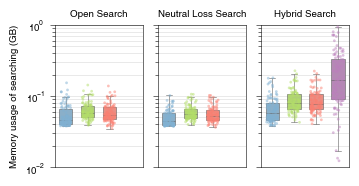

In [6]:
charge=1
df_charge=df_melted[df_melted["charge"]==charge]
hue_order=["dynamic_entropy_search(fast_update)", "dynamic_entropy_search(convert_to_flash)", "flash_entropy_search", "masstplus"]
color_palette_set2 = sns.color_palette("Set3", 12)

color_palette={
    
    "dynamic_entropy_search(fast_update)": color_palette_set2[4],
    "dynamic_entropy_search(convert_to_flash)": color_palette_set2[6],
    "flash_entropy_search":color_palette_set2[3],
    "masstplus":color_palette_set2[-3]
}

# Plotting
        
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(3.6, 2.4), width_ratios=[1.2,1.2,1.2], sharex=False, sharey=True)

for i, search in enumerate(["open_search", "neutral_loss_search", "hybrid_search"]):
    df_plot=df_charge[df_charge["search_type"]==search]
    ax=axes[i]
    ax.grid(True, which="both", axis="y", ls="-", alpha=0.5, linewidth=0.4)
    ax.set_title(search.replace("_"," ").title(), fontsize=matplotlib_font_size)

    sns.stripplot(x="method", y="memory_usage", hue="method", data=df_plot, hue_order=hue_order, palette=color_palette, dodge=False, jitter=0.25, size=2, alpha=0.5, linewidth=0, ax=ax, legend=False)        
            
    sns.boxplot(x="method", y="memory_usage", hue="method", data=df_plot, hue_order=hue_order, dodge=False, palette=color_palette, linewidth=0.4, width=0.6, ax=ax, fliersize=0)
    
    ax.tick_params(which="both", width=0.4)          
    for spine in ax.spines.values():  
        spine.set_linewidth(0.4)

    ax.legend().remove()
    ax.set_ylim(top=1e0, bottom=1e-2)
    ax.set_yscale("log")
    ax.set_ylabel("Memory usage of searching (GB)")
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_xticks([])
if charge==-1:
    mode="-"
elif charge==1:
    mode="+"
# fig.text(0.5, 0.2, f"({mode}) ESI", ha='center', va='bottom', fontsize=matplotlib_font_size)
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)
# Save figure
plt.savefig(path_figures / f"memory_usage_different_search_methods_charge_{charge}_lib_scale_1000000.svg", bbox_inches="tight", pad_inches=0.1)